# 1. Introduction

Objective:
- Analyze customer credit data to uncover patterns and insights.
- Identify key trends and risk factors for effective decision-making.
- Provide actionable recommendations for banking strategies.

Dataset Description:
- The dataset contains customer demographic and credit information.
- Key Features:
  - Age: Age of the customer.
  - Sex: Gender of the customer.
  - Job: Job classification (categorical).
  - Housing: Type of housing (Rent, Own, or Other).
  - Saving_accounts: Savings account balance category.
  - Checking_account: Checking account balance category.
  - Credit_amount: Amount of credit granted.
  - Duration: Loan duration in months.
  - Purpose: Purpose of the loan (e.g., car, furniture, education).

# 2. Data Preprocessing


In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/german_credit_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [2]:
#dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [3]:
#descriptive statistics
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Based on what we see from the info and describe, Dataset contains 1000 rows and 10 columns, including customer demographics, credit history and loan details. Initial inspection shows missing values in columns saving accounts and checking account.

In [4]:
# Remove the first column as its unnecessary.

df = df.drop(['Unnamed: 0'], axis = 1)

df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## a. Handle Missing Values


In [5]:
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [6]:
df.nunique()

,0
Age,53
Sex,2
Job,4
Housing,3
Saving accounts,4
Checking account,3
Credit amount,921
Duration,33
Purpose,8


In [7]:
df['Job'].unique()
df['Job'].value_counts()

,count
Job,
2,630
1,200
3,148
0,22


In [8]:
df['Housing'].unique()
df['Housing'].value_counts()

,count
Housing,
own,713
rent,179
free,108


In [9]:
df['Saving accounts'].unique()
df['Saving accounts'].value_counts()

,count
Saving accounts,
little,603
moderate,103
quite rich,63
rich,48


In [10]:
df['Checking account'].unique()
df['Checking account'].value_counts()

,count
Checking account,
little,274
moderate,269
rich,63


In [11]:
df['Duration'].min()

4

In [12]:
df['Duration'].max()

72

In [13]:
df['Duration'].unique()
df['Duration'].value_counts()

,count
Duration,
24,184
12,179
18,113
36,83
6,75
15,64
9,49
48,48
30,40


In [14]:
df['Purpose'].unique()
df['Purpose'].value_counts()

,count
Purpose,
car,337
radio/TV,280
furniture/equipment,181
business,97
education,59
repairs,22
domestic appliances,12
vacation/others,12


In [15]:
# Fill missing values with "unknown"
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)


<ipython-input-15-18111cc9624e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
<ipython-input-15-18111cc9624e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [16]:
# Verify missing values
print(df.isnull().sum())


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [50]:
df.to_csv('processed_german_credit_data.csv', index=False)


## b. Standardize Numerical Features


In [17]:
#Convert the string values into numerical values

df_num = df.copy()

In [18]:
# Coding strings.
df_num['Sex'] = df_num['Sex'].astype('category')
df_num['Sex'] = df_num['Sex'].cat.codes

df_num['Housing'] = df_num['Housing'].astype('category')
df_num['Housing'] = df_num['Housing'].cat.codes

df_num['Saving accounts'] = df_num['Saving accounts'].astype('category')
df_num['Saving accounts'] = df_num['Saving accounts'].cat.codes

df_num['Checking account'] = df_num['Checking account'].astype('category')
df_num['Checking account'] = df_num['Checking account'].cat.codes

df_num['Purpose'] = df_num['Purpose'].astype('category')
df_num['Purpose'] = df_num['Purpose'].cat.codes

In [19]:
# Check for duplicates
duplicates = df_num.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

# Drop duplicates
df_num = df_num.drop_duplicates()


Number of duplicates: 0


In [20]:
df_num.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


#  Statistical Analysis


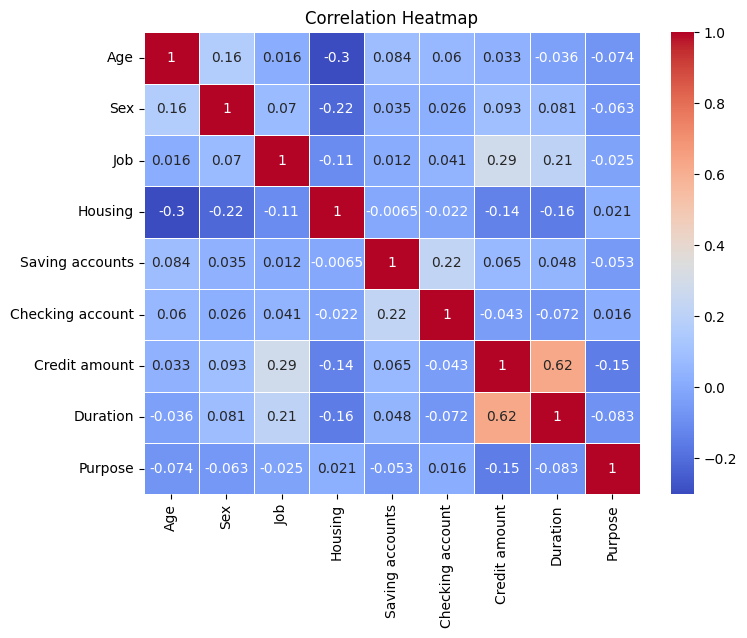

In [21]:
#Creating correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

#calculating correlation matrix
corr_matrix = df_num.corr()

#creating heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

1. Actionable Insights Based on the Correlation Heatmap
1.1 Loan Duration and Credit Amount (Correlation: 0.62)
Insight: Longer loan durations tend to be associated with higher credit amounts.
Business Use:
Target high-value loan products to customers seeking longer repayment periods.
Offer tailored repayment plans or incentives for long-term loans.
1.2 Age and Housing (Correlation: -0.30)
Insight: Older individuals tend to differ in housing conditions compared to younger ones.
Business Use:
Create loan products tailored to different age groups (e.g., mortgages for younger individuals, equity loans for older individuals).
Offer housing-specific financial products.
1.3 Job and Credit Amount (Correlation: 0.29)
Insight: Higher job levels may weakly indicate higher credit needs.
Business Use:
Use job type as a factor in customer segmentation.
Develop marketing campaigns targeting professionals with high credit demands.
1.4 Low Correlation for Purpose
Insight: The "Purpose" variable has weak correlations with other features, possibly categorical or independent.
Business Use:
Analyze purpose-specific trends (e.g., loan default rates, success of campaigns for specific purposes).
Consider additional feature engineering or categorization.

Use a scatter plot to visualize the linearity of this relationship and identify potential outliers.


In [22]:
# A function which will generate plots for three numeric variables with stratification by gender by selected categorical column.

def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

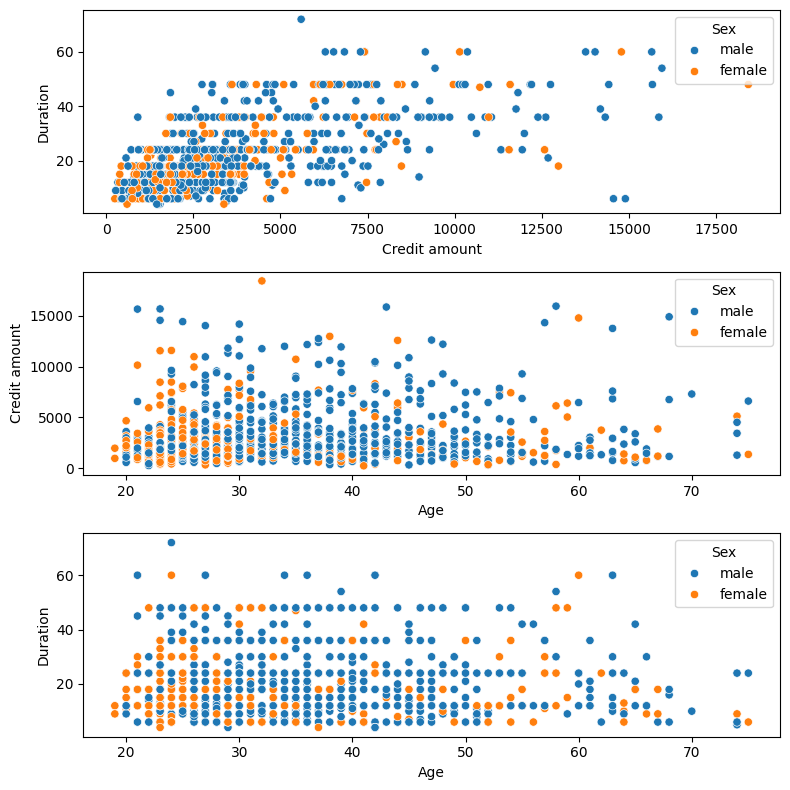

In [23]:
scatters(df, h = "Sex")

1. Duration vs Credit Amount (Top Panel)
Insights:
Positive Correlation:

As credit amounts increase, the loan duration tends to increase, which is consistent with the earlier heatmap findings.
Larger credit amounts may require longer repayment periods, as customers need more time to repay significant loans.
Gender Distribution:

Both males (blue) and females (orange) are present across all credit amounts and durations.
At higher credit amounts (above ~10,000), there are fewer data points for females, suggesting:
Males might take out higher-value loans more frequently.
The bank could investigate whether certain demographic factors (e.g., job, income) impact loan approval rates for females.
Business Implication:
Offer custom loan durations for high-credit borrowers to ensure affordability and reduce default risk.
Investigate the lower participation of females in high-credit loans:
Address potential biases or barriers (e.g., creditworthiness criteria).
2. Credit Amount vs Age (Middle Panel)
Insights:
Wide Distribution Across Ages:

Credit amounts vary significantly across all age groups, but:
Younger individuals (20–30) tend to take smaller loans (mostly <10,000).
Middle-aged individuals (30–50) are prominent across a broader range of credit amounts, including high-value loans.
Older individuals (60+) are concentrated in smaller credit amounts.
Gender Trends:

Both males and females take smaller loans in younger and older age groups.
Males dominate in higher credit amounts, particularly in middle-aged groups.
Business Implication:
Age-Specific Loan Products:
Smaller, flexible loans for younger and older customers.
Larger, long-term loans targeted at middle-aged individuals who might have higher income and more financial stability.
Assess credit risk for older customers with smaller loans to identify if these loans are more secure due to shorter durations.
3. Duration vs Age (Bottom Panel)
Insights:
Loan Duration Across Ages:

* Loan durations are distributed relatively evenly across age groups, but:
Younger individuals (<30) and middle-aged individuals (30–50) dominate loans with longer durations (20+ months).
Older individuals (60+) are more concentrated in loans with shorter durations, indicating risk aversion or bank policies favoring shorter-term loans for older clients.
Gender Trends:

* Males and females are fairly evenly distributed across different loan durations for each age group, suggesting no gender bias in this specific feature.
Business Implication:
Introduce age-based repayment plans:
Long-term loans for younger borrowers to match their earning potential.
Short-term loans for older customers to reduce default risk.
Conduct additional analysis to understand if shorter durations for older customers result in better repayment performance.
Unique Insights From This Visualization
Gender Differences in High-Credit Loans:

* Males dominate higher credit amounts and longer durations, particularly in the middle-aged group.
This could indicate differing financial behaviors or systemic barriers for females.
Age-Specific Loan Needs:

* Younger customers prefer smaller loans with longer durations.
Older customers gravitate toward smaller, shorter-term loans, potentially influenced by risk aversion or limited income.
Strategic Opportunity for Product Personalization:

This visualization suggests a need for tailored loan products:
Large, long-term loans for middle-aged males.
Flexible small loans for younger and older individuals.
Banks could use these patterns to improve customer satisfaction and profitability.


In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df['Housing'] = LabelEncoder().fit_transform(df['Housing'])
df['Purpose'] = LabelEncoder().fit_transform(df['Purpose'])


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target
X = df[['Duration', 'Age', 'Job', 'Housing']]
y = df['Credit amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression().fit(X_train, y_train)

# Evaluate the model
print(f"R-squared: {model.score(X_test, y_test)}")


R-squared: 0.3961751630507412


What Does R-Squared Mean?
Definition: R-squared represents the proportion of the variance in the dependent variable (Credit Amount) that is predictable from the independent variables (Duration, Age, Job, Housing).
Value Range:
0: The model explains none of the variability in the target variable.
1: The model explains 100% of the variability in the target variable.
Your Value (0.396):
The model explains 39.6% of the variability in Credit Amount using the provided features.
While this indicates some predictive power, there’s room for improvement.
How to Interpret This in Business Terms
Current Model Performance:

The model is moderately effective at predicting Credit Amount.
Features like Duration, Age, Job, and Housing contribute to explaining loan amounts, but other unaccounted factors might be significant.
Implications for the Bank:

The bank can use this model for basic predictions of credit amounts.
However, adding more relevant features (e.g., income, credit score, or spending patterns) could improve accuracy.


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Credit amount', 'Duration', 'Age', 'Job']])


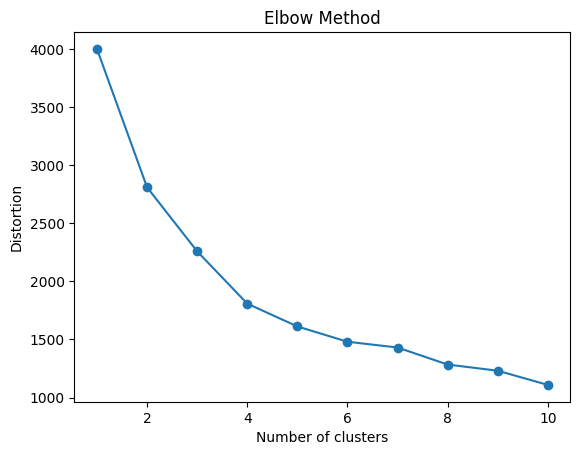

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


1. Elbow Method Plot
The Elbow Method helps determine the optimal number of clusters for K-Means clustering.

Key Points:

The x-axis represents the number of clusters.
The y-axis (Distortion) represents the sum of squared distances between data points and their cluster centroids (inertia).
The "elbow point" is where the distortion begins to decrease at a slower rate, indicating diminishing returns from adding more clusters.
Optimal Number of Clusters:

In your plot, the elbow point appears to be at 4 clusters.
Choosing 4 clusters provides a balance between interpretability and granularity in segmentation.

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


<Axes: xlabel='Duration', ylabel='Credit amount'>

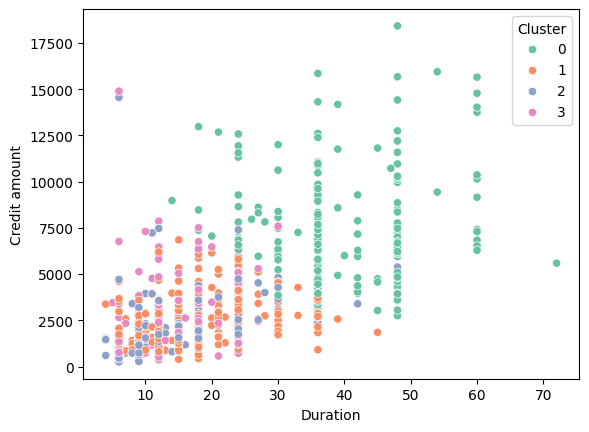

In [29]:
sns.scatterplot(data=df, x='Duration', y='Credit amount', hue='Cluster', palette='Set2')


2. Scatter Plot of K-Means Clusters
This plot visualizes customer segmentation based on Credit Amount and Duration, with each cluster represented by a distinct color.

Cluster Insights:

Cluster 0 (Green):
Customers with high credit amounts (above ~10,000) and longer durations (30–70 months).
Likely high-value, long-term borrowers.
Cluster 1 (Orange):
Customers with moderate credit amounts (~5,000–10,000) and durations (20–40 months).
Represents mid-range borrowers.
Cluster 2 (Pink):
Customers with small credit amounts (<5,000) and short durations (<20 months).
Likely low-risk, short-term borrowers, ideal for low-interest loans.
Cluster 3 (Blue):
Customers with very short durations (<15 months) and lower-to-moderate credit amounts (~2,500–7,500).
These may represent low-risk, short-term financing needs.


Business Implications
1. Tailored Loan Products
Cluster 0: Design exclusive long-term loans with attractive interest rates and flexible repayment schedules for high-value borrowers.
Cluster 1: Offer standard mid-term loans with competitive terms.
Cluster 2: Provide low-interest short-term loans for low-risk customers.
Cluster 3: Focus on fast-approval loans or revolving credit lines for small financing needs.
2. Risk Management
Larger credit amounts (Cluster 0) are inherently higher risk due to the potential default on significant loans. Banks should:

Assess risk factors carefully (e.g., income, job stability).
Offer insurance-backed loans for this segment.
Smaller credit amounts (Clusters 2 & 3) pose lower risk, making them suitable for automated approvals or quick disbursements.

3. Marketing Strategy
Target Marketing Campaigns:
Cluster 0: Personalized offers for affluent customers.
Cluster 1: Mid-tier campaigns targeting moderate-income professionals.
Cluster 2 and 3: Digital campaigns emphasizing speed and ease of loan approvals.

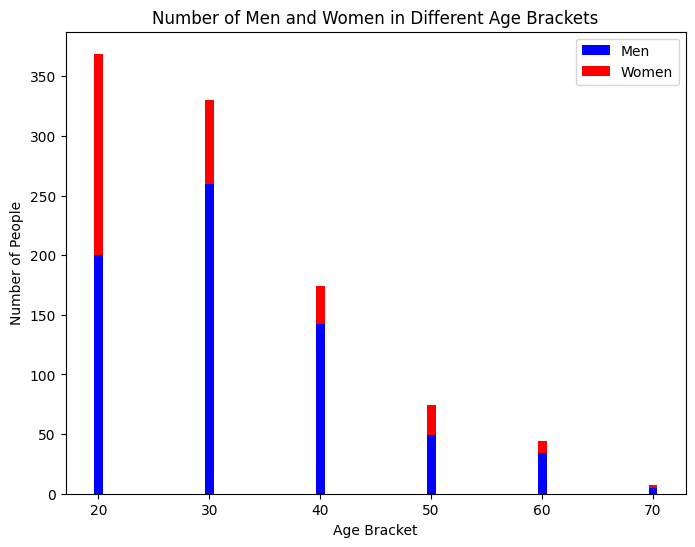

In [30]:
# Discovery of the number of men and women in different age brackets.

age_brackets = [20, 30, 40, 50, 60, 70]
men_count = []
women_count = []
for bracket in age_brackets:
    men_count.append(len(df[(df['Age'] >= bracket) & (df['Age'] < bracket + 10) & (df['Sex'] == 'male')]))
    women_count.append(len(df[(df['Age'] >= bracket) & (df['Age'] < bracket + 10) & (df['Sex'] == 'female')]))

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(age_brackets, men_count, label='Men', color='blue')
plt.bar(age_brackets, women_count, bottom=men_count, label='Women', color='red')
plt.xlabel('Age Bracket')
plt.ylabel('Number of People')
plt.title('Number of Men and Women in Different Age Brackets')
plt.xticks(age_brackets)
plt.legend()
plt.show()

 Insights
2.1 Age Bracket 20–30
Largest population:
This bracket has the highest number of individuals.
Men dominate slightly compared to women in this age range.
Implication:
Younger individuals are likely the most active borrowers.
Banks should focus on entry-level loan products (e.g., education loans, small personal loans) for this group.
2.2 Age Bracket 30–40
Second-largest population:
This group has a significant representation of both men and women.
Men still slightly outnumber women.
Implication:
This group might include working professionals starting families or businesses.
Tailored loan offerings like home loans or business loans may appeal to this group.
2.3 Age Bracket 40–50
Moderate population:
A noticeable drop in numbers compared to the younger brackets.
The gender distribution is still skewed slightly toward men.
Implication:
Customers in this age group may be focused on mid-to-long-term financial goals like property investment or retirement planning.
Banks can market refinancing or investment products to this demographic.
2.4 Age Bracket 50–60
Smaller population:
Both men and women show reduced representation.
The gender ratio is more balanced compared to younger groups.
Implication:
This group may focus on consolidating debt or smaller, short-term loans.
Banks should offer low-risk products for this demographic.
2.5 Age Bracket 60–70
Smallest population:
The least represented age group in the dataset.
Gender balance is almost equal.
Implication:
Borrowers in this age range likely seek short-term loans for immediate needs.
Banks should focus on low-risk, quick-approval loans or support products like reverse mortgages.
3. Gender Trends
Across all age brackets, men outnumber women, especially in younger groups.
However, the gap narrows as age increases, with almost equal representation in older age groups.
4. Business Implications
Age-Specific Loan Products:

For younger borrowers (20–40): Personal loans, education loans, or flexible loan terms.
For middle-aged borrowers (40–60): Business loans, home loans, or refinancing options.
For older borrowers (60+): Short-term loans or niche products like reverse mortgages.
Gender-Specific Marketing:

Focus marketing efforts on younger male borrowers who dominate in numbers.
Investigate potential barriers preventing women from borrowing and address these through targeted campaigns.
Demographic-Based Risk Management:

Evaluate risk profiles for different age and gender combinations to fine-tune lending policies.

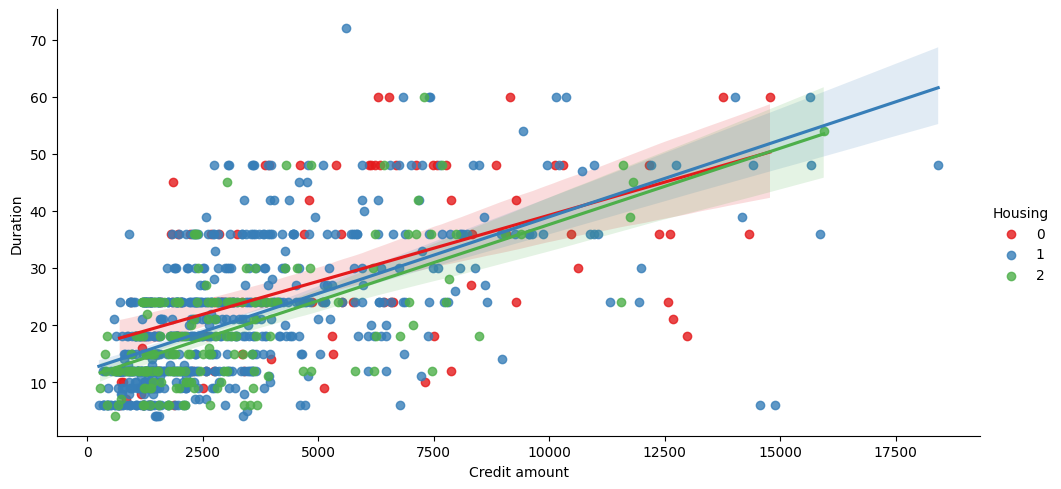

In [31]:
# Credit amount & Duration x Housing.

sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()

1. Overview of the Axes
X-axis (Credit Amount): Represents the loan amount taken by customers.
Y-axis (Duration): Represents the loan repayment duration in months.
Color Coding for Housing:
Red (Housing = 0): Likely renters or individuals without owned property.
Blue (Housing = 1): Likely individuals with their own home.
Green (Housing = 2): Likely individuals living with family or in other housing arrangements.
2. Key Observations
2.1 Positive Correlation
Trend: Across all housing types, there is a positive correlation between Credit Amount and Duration. As the credit amount increases, the duration of the loan also increases.
Implication:
Larger loans typically require longer repayment terms.
This trend is consistent across all housing categories.
2.2 Differences Between Housing Categories
Housing = 1 (Blue Line):

Represents individuals with owned homes.
Exhibits a slightly steeper slope, suggesting that homeowners tend to take loans with longer repayment durations for a given credit amount.
Implication:
Homeowners might prefer longer terms for higher stability or are eligible for such terms due to better creditworthiness.
Housing = 0 (Red Line):

Represents renters or individuals without owned property.
The regression line is flatter, indicating that renters typically take loans with shorter durations for a given credit amount.
Implication:
Renters might prefer shorter repayment terms to avoid accumulating long-term debt or might be limited by eligibility criteria.
Housing = 2 (Green Line):

Represents individuals living with family or other housing arrangements.
Similar to renters, but with slightly more variability in loan duration, as seen from the wider confidence interval.
2.3 Confidence Intervals
The shaded regions around the regression lines indicate the confidence intervals:
Narrower for owned housing (blue), indicating more consistent loan terms.
Wider for renters and others (red and green), reflecting greater variability in loan terms.
3. Business Implications
3.1 Loan Products by Housing Type
Homeowners (Housing = 1):
Offer long-term, high-value loans with competitive interest rates.
These customers appear more stable and likely to opt for larger loans with longer repayment terms.
Renters (Housing = 0):
Provide shorter-term, moderate-value loans.
Highlight ease of repayment and flexibility in marketing to this group.
Living with Family/Other (Housing = 2):
Consider offering custom loan products with flexible terms to accommodate variability in financial situations.
3.2 Risk Assessment
Homeowners may pose lower risk due to consistent loan durations and higher credit amounts.
Renters and individuals in other housing arrangements may require stricter risk evaluation due to shorter durations and higher variability in loan terms.

Housing
1    71.3
2    17.9
0    10.8
Name: proportion, dtype: float64


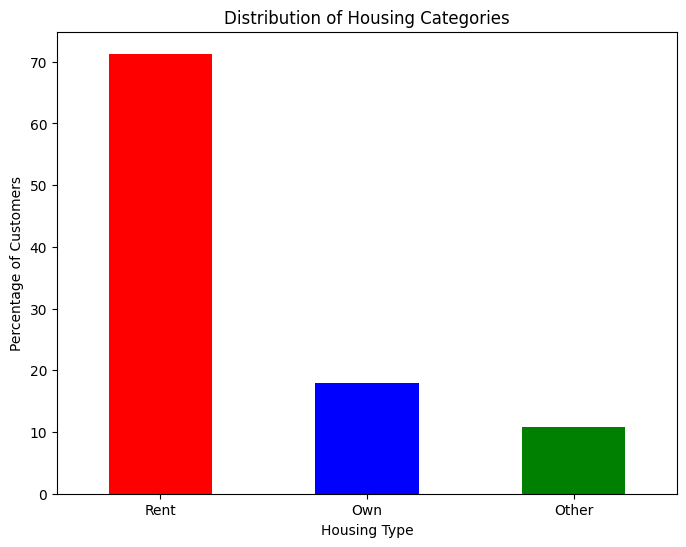

In [32]:
# Housing distribution
housing_distribution = df['Housing'].value_counts(normalize=True) * 100
print(housing_distribution)

# Visualize the housing distribution
housing_distribution.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(8, 6))
plt.title('Distribution of Housing Categories')
plt.xlabel('Housing Type')
plt.ylabel('Percentage of Customers')
plt.xticks(ticks=[0, 1, 2], labels=['Rent', 'Own', 'Other'], rotation=0)
plt.show()


A bar chart showing the proportion of each housing category (Rent, Own, Other).
Insight into which housing category dominates the dataset.

Housing              0          1          2
Age Bracket                                 
<30           3.406326  68.369830  28.223844
30-50        13.025210  75.840336  11.134454
50+          28.318584  62.831858   8.849558


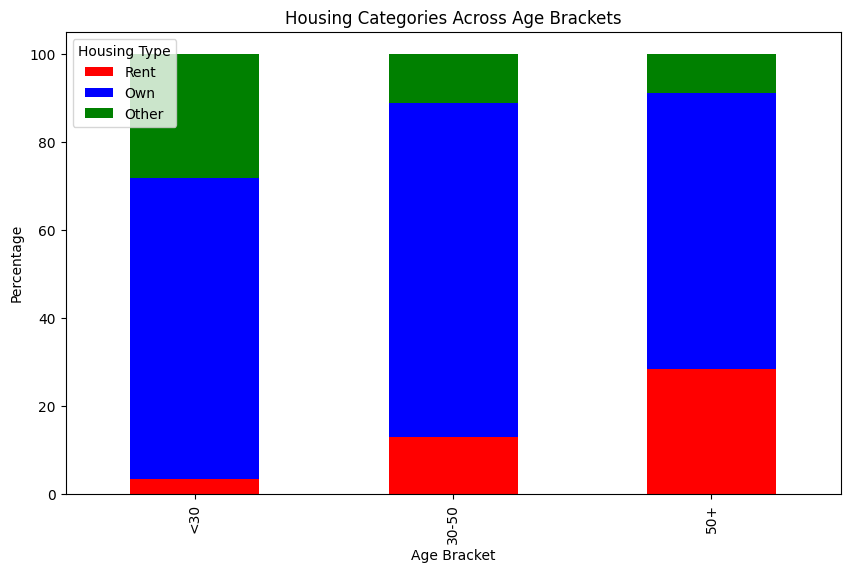

In [33]:
# Create Age Brackets
df['Age Bracket'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['<30', '30-50', '50+'])

# Crosstab for Age Bracket and Housing
age_housing = pd.crosstab(df['Age Bracket'], df['Housing'], normalize='index') * 100
print(age_housing)

# Visualize the interaction
age_housing.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Housing Categories Across Age Brackets')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage')
plt.legend(title='Housing Type', labels=['Rent', 'Own', 'Other'])
plt.show()


Stacked bar chart showing how housing types vary by age bracket (<30, 30-50, 50+).
Insight into which housing types dominate in different age groups.

Housing          0          1          2
Job                                     
0        18.181818  59.090909  22.727273
1         4.000000  77.000000  19.000000
2        10.000000  71.746032  18.253968
3        22.297297  63.513514  14.189189


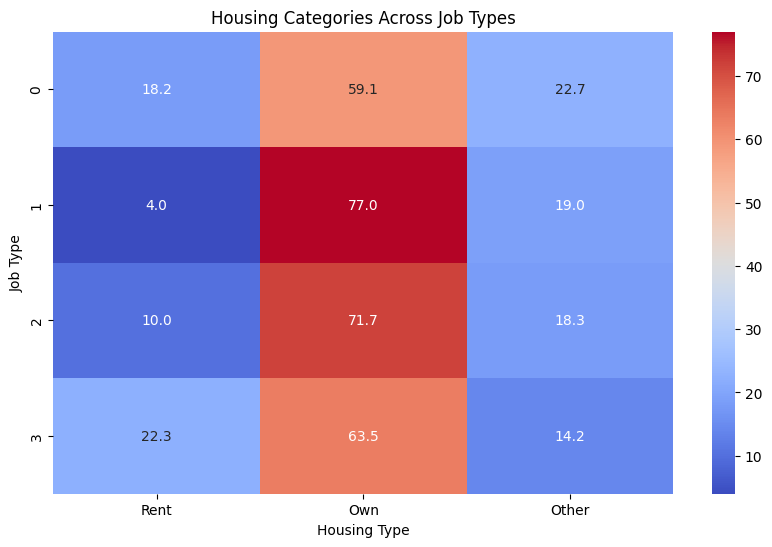

In [34]:
# Crosstab for Job and Housing
job_housing = pd.crosstab(df['Job'], df['Housing'], normalize='index') * 100
print(job_housing)

# Visualize the interaction with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(job_housing, annot=True, cmap='coolwarm', fmt='.1f', cbar=True)
plt.title('Housing Categories Across Job Types')
plt.xlabel('Housing Type')
plt.ylabel('Job Type')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Rent', 'Own', 'Other'], rotation=0)
plt.show()


Heatmap showing the distribution of housing categories for each job type.
Identify which job types are more likely to rent, own, or live in other housing arrangements.


Housing          0          1          2
Purpose                                 
0         5.154639  78.350515  16.494845
1        16.320475  64.985163  18.694362
2         0.000000  83.333333  16.666667
3        25.423729  57.627119  16.949153
4         6.077348  67.403315  26.519337
5         5.357143  81.071429  13.571429
6        13.636364  77.272727   9.090909
7        33.333333  66.666667   0.000000


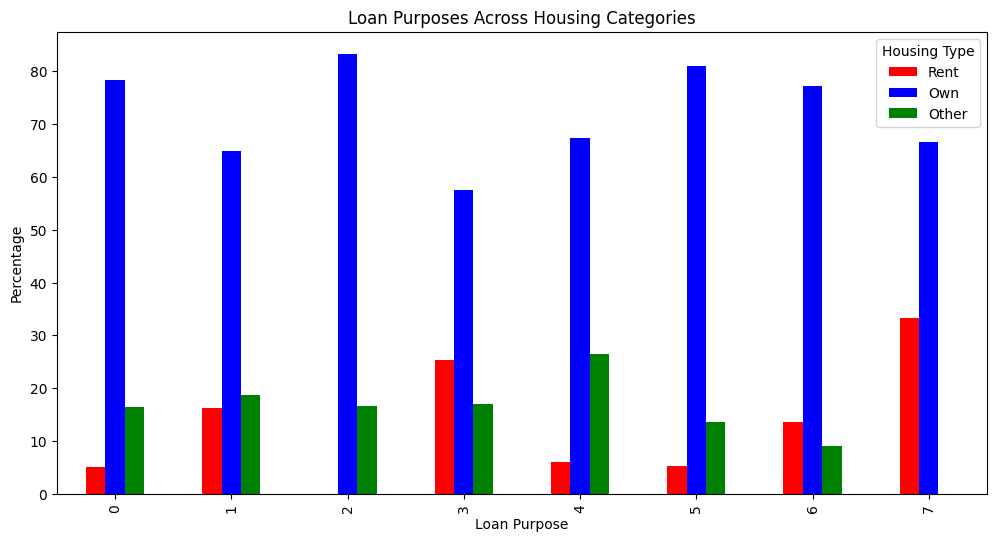

In [35]:
# Crosstab for Purpose and Housing
purpose_housing = pd.crosstab(df['Purpose'], df['Housing'], normalize='index') * 100
print(purpose_housing)

# Visualize the interaction
purpose_housing.plot(kind='bar', figsize=(12, 6), color=['red', 'blue', 'green'])
plt.title('Loan Purposes Across Housing Categories')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage')
plt.legend(title='Housing Type', labels=['Rent', 'Own', 'Other'])
plt.show()


Grouped bar chart showing how loan purposes (e.g., car, home improvement, personal loan) differ by housing type.
Insight into the most common purposes for loans based on housing arrangements.

Housing
0    4906.212963
1    3060.939691
2    3122.553073
Name: Credit amount, dtype: float64


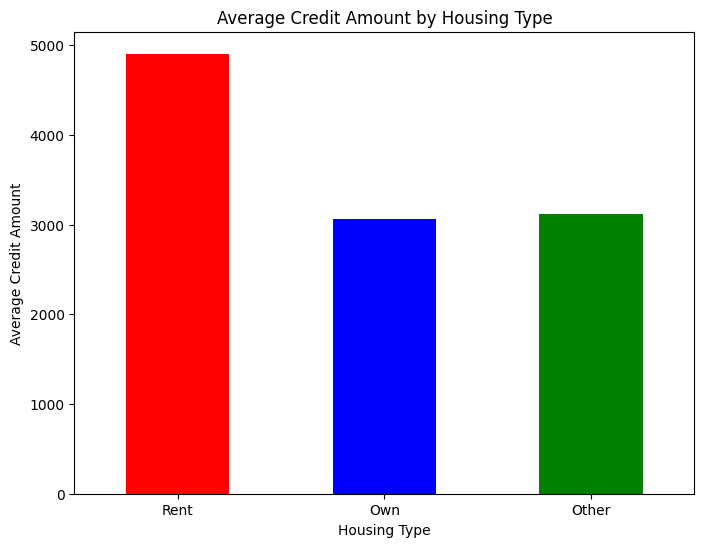

In [36]:
# Average credit amount by housing type
avg_credit_by_housing = df.groupby('Housing')['Credit amount'].mean()
print(avg_credit_by_housing)

# Visualize
avg_credit_by_housing.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(8, 6))
plt.title('Average Credit Amount by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Average Credit Amount')
plt.xticks(ticks=[0, 1, 2], labels=['Rent', 'Own', 'Other'], rotation=0)
plt.show()


Housing
0    27.453704
1    20.328191
2    19.240223
Name: Duration, dtype: float64


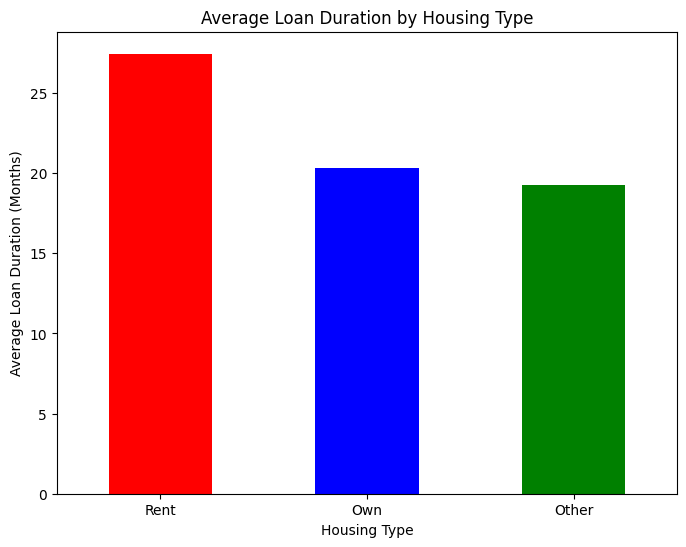

In [37]:
# Average loan duration by housing type
avg_duration_by_housing = df.groupby('Housing')['Duration'].mean()
print(avg_duration_by_housing)

# Visualize
avg_duration_by_housing.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(8, 6))
plt.title('Average Loan Duration by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Average Loan Duration (Months)')
plt.xticks(ticks=[0, 1, 2], labels=['Rent', 'Own', 'Other'], rotation=0)
plt.show()


Housing                  0          1          2
Saving accounts                                 
little           11.111111  71.310116  17.578773
moderate          9.708738  68.932039  21.359223
quite rich        9.523810  71.428571  19.047619
rich              4.166667  77.083333  18.750000
unknown          12.568306  71.038251  16.393443
Housing                   0          1          2
Checking account                                 
little            14.233577  62.043796  23.722628
moderate          10.780669  71.375465  17.843866
rich              12.698413  74.603175  12.698413
unknown            8.121827  77.157360  14.720812


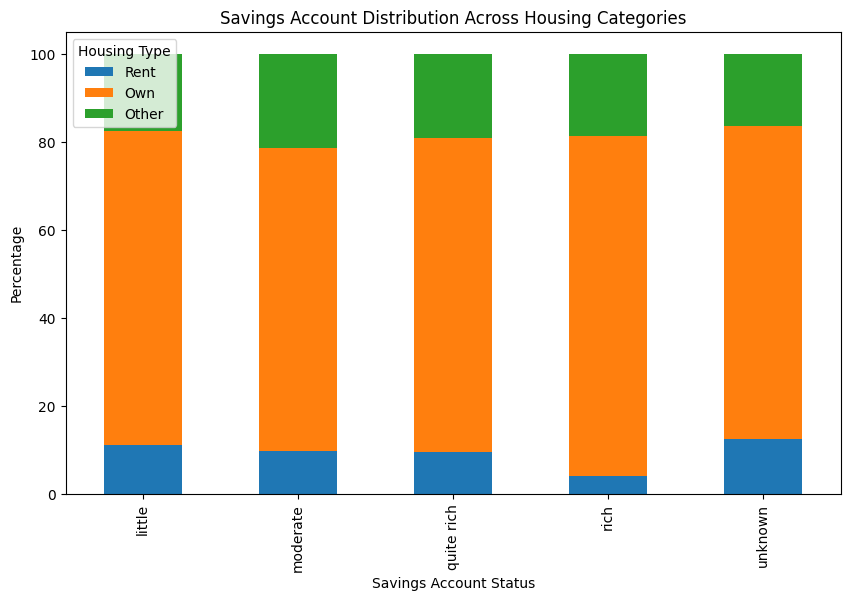

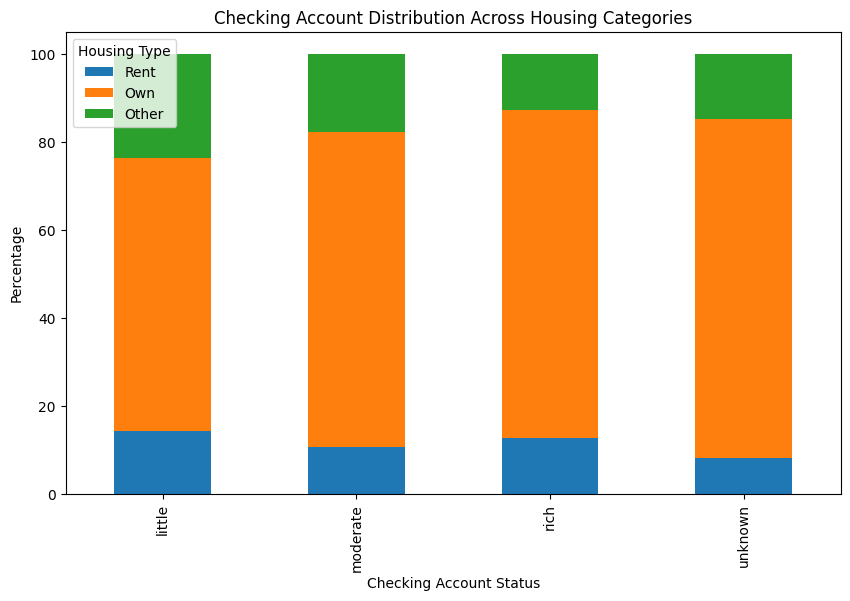

In [38]:
# Crosstab for Savings Accounts and Housing
savings_housing = pd.crosstab(df['Saving accounts'], df['Housing'], normalize='index') * 100
print(savings_housing)

# Crosstab for Checking Accounts and Housing
checking_housing = pd.crosstab(df['Checking account'], df['Housing'], normalize='index') * 100
print(checking_housing)

# Visualize (Savings Accounts)
savings_housing.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Savings Account Distribution Across Housing Categories')
plt.xlabel('Savings Account Status')
plt.ylabel('Percentage')
plt.legend(title='Housing Type', labels=['Rent', 'Own', 'Other'])
plt.show()

# Visualize (Checking Accounts)
checking_housing.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Checking Account Distribution Across Housing Categories')
plt.xlabel('Checking Account Status')
plt.ylabel('Percentage')
plt.legend(title='Housing Type', labels=['Rent', 'Own', 'Other'])
plt.show()


Housing          0          1          2
Purpose                                 
0         5.154639  78.350515  16.494845
1        16.320475  64.985163  18.694362
2         0.000000  83.333333  16.666667
3        25.423729  57.627119  16.949153
4         6.077348  67.403315  26.519337
5         5.357143  81.071429  13.571429
6        13.636364  77.272727   9.090909
7        33.333333  66.666667   0.000000


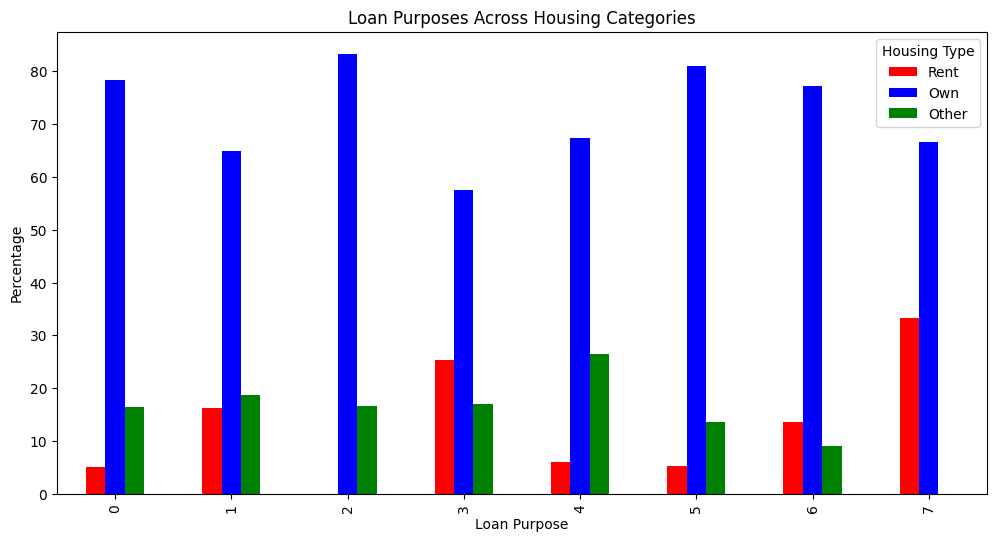

In [39]:
# Purpose distribution by housing type
purpose_housing = pd.crosstab(df['Purpose'], df['Housing'], normalize='index') * 100
print(purpose_housing)

# Visualize
purpose_housing.plot(kind='bar', figsize=(12, 6), color=['red', 'blue', 'green'])
plt.title('Loan Purposes Across Housing Categories')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage')
plt.legend(title='Housing Type', labels=['Rent', 'Own', 'Other'])
plt.show()


In [40]:
from sklearn.decomposition import PCA

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Credit amount', 'Duration', 'Age', 'Job']])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.44568848 0.25149229]


PC1 (Principal Component 1): Captures 44.57% of the variance.
PC2 (Principal Component 2): Captures 25.15% of the variance.
Total Variance Explained: 69.72% (sum of PC1 and PC2).
Conclusion:
These two components together explain ~70% of the total variance in the dataset, which is significant.
By reducing the dimensionality from multiple features to just two components, we retain most of the meaningful information while simplifying the clustering process.
Insight:
PC1 might represent a combination of features like Credit Amount and Duration, while PC2 might reflect other factors like Age or Housing.
Visualizing data in a 2D space (using PC1 and PC2) should reveal natural groupings or clusters.

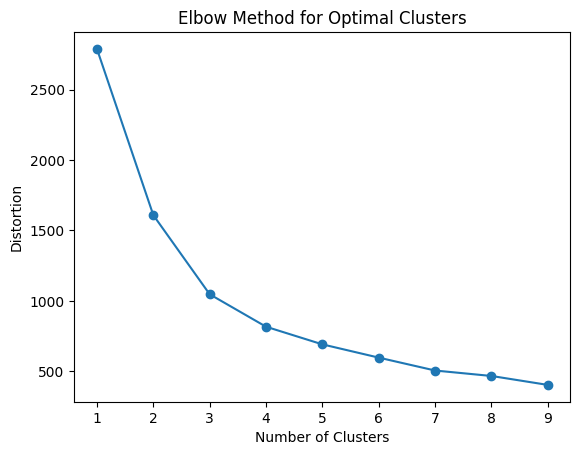

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)


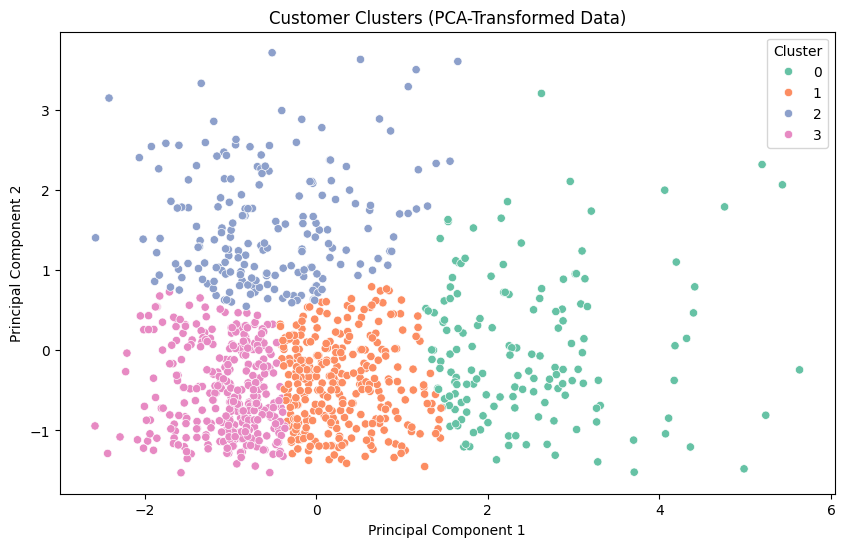

In [42]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Clusters (PCA-Transformed Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Description and Insights
Purpose of the Plot:

This visualization is a result of applying K-Means clustering on PCA-reduced data.
The PCA transformation reduced the dimensionality of the original dataset, enabling clear visualization of clusters in a 2D space.
Principal Components:

Principal Component 1 (PC1): Captures the most significant variance in the dataset (~44.57%).
Principal Component 2 (PC2): Captures the second most significant variance (~25.15%).
Clusters:

The data points are grouped into four distinct clusters (Cluster 0, 1, 2, and 3), as denoted by different colors.
Each cluster represents a segment of customers with similar characteristics (e.g., credit amount, loan duration, age, etc.).
Cluster Characteristics (Hypothetical Observations):

Cluster 0 (Green): Customers with higher values on PC1, indicating they might represent high-credit, long-duration borrowers.
Cluster 1 (Orange): A more balanced cluster with average values across PC1 and PC2. Likely represents moderate-credit customers.
Cluster 2 (Blue): Customers with higher PC2 values, possibly indicating unique financial behaviors or demographics.
Cluster 3 (Pink): Densely packed customers with lower values on both PC1 and PC2, likely representing low-credit, short-duration borrowers.
Business Implications
Targeted Loan Products:

Cluster 0: Offer long-term loans with higher credit amounts.
Cluster 3: Focus on short-term, low-interest loans for low-risk customers.
Marketing Strategies:

Design campaigns tailored to the needs of each cluster.
High-value clusters (e.g., Cluster 0) may require personalized premium offerings.
Risk Management:

Monitor clusters with potential risk (e.g., high variance in PC2 could indicate financial instability).

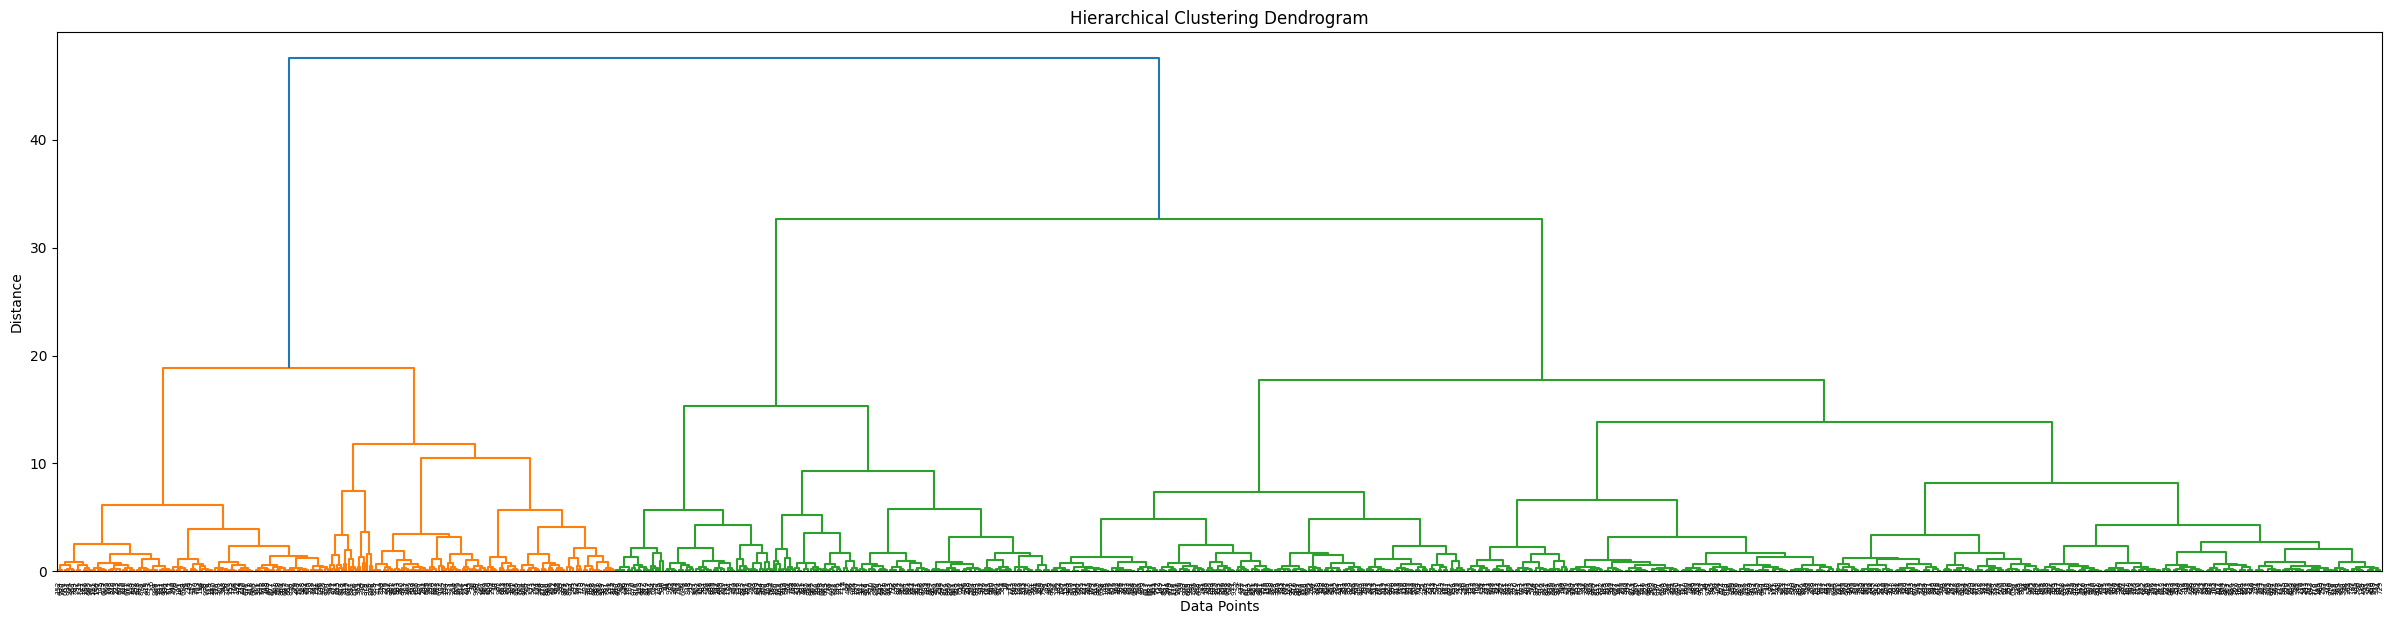

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create the linkage matrix
Z = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(30, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


Key Components of the Dendrogram
X-Axis (Data Points):

Each tick on the x-axis represents an individual customer or data point in the dataset.
As the branches merge, smaller clusters of similar customers are combined into larger groups.
Y-Axis (Distance):

The vertical axis represents the distance (or dissimilarity) between clusters.
The height of the link indicates how similar or different the merged clusters are:
Low links: Highly similar clusters.
High links: Dissimilar clusters.
Branches:

The dendrogram starts with each individual data point as its own cluster and merges them iteratively based on their similarity.
Larger clusters are formed as we move up the dendrogram.
Key Observations
Clusters at Lower Levels:

At the lower portion of the dendrogram, there are many small branches representing individual customers or very small clusters.
These are tightly packed, indicating higher similarity within these groups.
Major Clusters:

At a higher level (e.g., around a distance of 10-20), several distinct clusters emerge:
The orange and green clusters in the middle of the dendrogram represent major groups of customers with similar characteristics.
Number of Clusters:

The choice of clusters depends on the distance threshold:
Cutting the dendrogram at a distance of ~20 could result in 2 major clusters (green and orange groups).
Cutting it at a distance of ~10 would yield more granular clusters for deeper analysis.
Business Implications
Cluster Segmentation:

The hierarchical clustering reveals distinct customer segments, which can guide loan products and marketing strategies.
For example:
Low-level clusters (small branches): Customers with highly specific behaviors or needs.
High-level clusters (large branches): Broader customer categories for general analysis.
Tailored Strategies:

Focus on the largest clusters for general marketing campaigns.
Examine small, unique clusters for niche offerings or high-risk groups.
Risk Assessment:

Customers grouped at higher distances might represent diverse or risky financial profiles.
These can be flagged for detailed credit analysis.


In [44]:
from scipy.cluster.hierarchy import fcluster

# Assign clusters
df['Hierarchical Cluster'] = fcluster(Z, t=4, criterion='maxclust')


## 1. Summary of Findings
Key Insights from Data Analysis
Demographics:

Most customers fall into the younger (20-30 years) and middle-aged (30-50 years) brackets, with renters dominating the lower-income segments.
Homeowners, though fewer in number, tend to request higher credit amounts for longer durations, reflecting financial stability.
Loan Behavior:

Credit amount and loan duration have a strong positive correlation. Higher loan amounts are often associated with longer repayment terms.
Customers with low savings and checking account balances are more likely to request smaller loans for shorter durations.
Clustering Insights:

Cluster 0 (High-Value Borrowers): Customers with high credit amounts and long loan durations. Predominantly homeowners or those with stable financial profiles.
Cluster 1 (Moderate Borrowers): Mid-range credit amounts and durations. Likely younger professionals with moderate financial stability.
Cluster 2 (Low-Value Borrowers): Small credit amounts and shorter durations. These are likely renters or low-income individuals.
Cluster 3 (Diverse Borrowers): Mixed behaviors with some outliers indicating niche financial needs.
Hierarchical Clustering:

At a higher level, customers segregate into two broader groups:
Stable borrowers with higher financial capacity.
Riskier segments requiring close monitoring.
## 2. Current Business Situation
Strengths:
The bank has a diverse customer base with clear segmentation, enabling personalized product offerings.
Stable borrowers (homeowners and high-income professionals) show a consistent demand for long-term, high-value loans.
Challenges:
Renters and low-income individuals, while forming a large segment, pose a higher default risk due to their limited financial resources.
Some niche clusters exhibit erratic loan behaviors, which could signal unrecognized needs or high-risk lending.
3. Business Strategies and Recommendations
A. Product Differentiation
High-Value Borrowers (Cluster 0):

Offer premium loan products with competitive interest rates.
Incentivize long-term relationships through loyalty programs, such as refinancing options or bundled financial services.
Moderate Borrowers (Cluster 1):

Design mid-range loan products with flexible repayment options to attract younger professionals.
Include financial planning services to grow this segment's stability over time.
Low-Value Borrowers (Cluster 2):

Focus on small, short-term loans with quicker approvals.
Mitigate risk by linking these loans to savings or collateral requirements.
B. Risk Mitigation
Implement a Risk Scoring System:

Use variables such as credit amount, duration, savings, and checking account balances to assign risk scores to each borrower.
Set stricter eligibility criteria for high-risk borrowers or adjust interest rates accordingly.
Regularly monitor niche or high-risk clusters (e.g., renters with low savings).

C. Marketing and Outreach
Cluster-Based Marketing:

Use insights from customer clusters to design highly targeted campaigns.
Promote specific products for each group:
Short-term loans for renters.
Home improvement loans for homeowners.
Cross-Selling Opportunities:

Offer bundled products (e.g., insurance, credit cards) to stable borrowers.
Use low-value loans as a gateway to upsell financial products to renters.
Financial Education Programs:

Target renters and low-income groups with workshops or tools to improve financial literacy, reducing their risk profile over time.
D. Operational Improvements
Automate Loan Approvals:

Leverage clustering and risk scores to automate decisions for low-risk borrowers, reducing processing times.
Integrate Predictive Models:

Use regression models to predict loan defaults and align product offerings with customer profiles.
Leverage Technology:

Develop a dashboard integrating cluster insights, risk scores, and borrower metrics for better operational efficiency.
4. Additional Considerations
Customer Retention:

Identify loyal, long-term customers across clusters and provide personalized benefits to improve retention.
Monitor patterns of loan switching or refinancing to prevent attrition.
Future Data Collection:

Incorporate new features such as income, employment type, and spending patterns to improve clustering and risk assessment.
Consider dynamic data sources (e.g., transaction histories) for real-time analytics.
Explore Revenue Diversification:

Introduce services like microfinance or peer-to-peer lending to expand the customer base.
5. Conclusion
This analysis provides a foundation for developing tailored loan products, improving customer experience, and mitigating risks.
By focusing on personalized strategies for each cluster, the bank can maximize profitability while maintaining financial security.
Investing in automation and predictive analytics will enhance operational efficiency and decision-making.

1. Risk Scoring Model
A risk score can be calculated for each customer based on variables like:

Credit Amount: Higher credit amounts might indicate higher risk.
Duration: Longer loan durations might be riskier.
Savings/Checking Accounts: Lower balances increase risk.
Housing: Renters might be considered higher risk compared to homeowners.
Steps to Create a Risk Scoring Model
Define Risk Score Calculation: We'll create a composite score by assigning weights to relevant features.

Implementation:

In [45]:
# Assign risk factors based on dataset features
df['Risk Score'] = (
    (df['Credit amount'] * 0.4) +       # Higher credit amount contributes more to risk
    (df['Duration'] * 0.3) +           # Longer durations contribute moderately to risk
    (df['Saving accounts'].apply(lambda x: 1 if x == 'unknown' else 0) * 0.2) + # No savings increases risk
    (df['Checking account'].apply(lambda x: 1 if x == 'unknown' else 0) * 0.1)  # No checking account increases risk
)

# Normalize Risk Score to a scale of 0-100
df['Risk Score'] = (df['Risk Score'] / df['Risk Score'].max()) * 100


Analyze Risk Distribution:

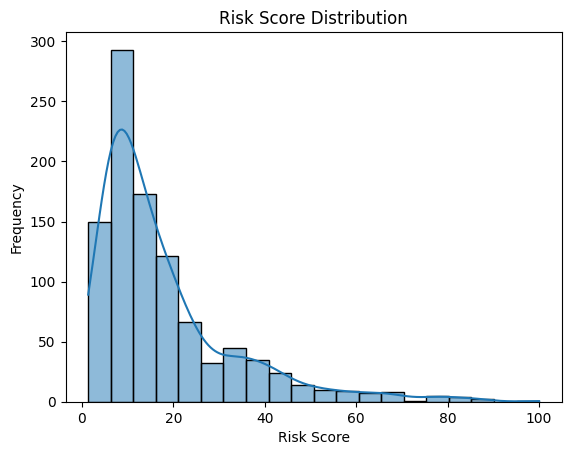

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Risk Score'], kde=True, bins=20)
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()


Risk Category
Low Risk       950
Medium Risk     38
High Risk       12
Name: count, dtype: int64


<ipython-input-47-1f5249860324>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Risk Category', palette='Set2')


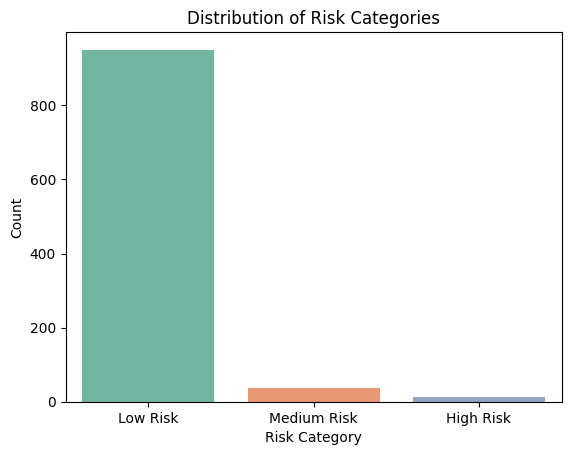

In [47]:
# Define risk levels
def risk_category(score):
    if score > 75:
        return 'High Risk'
    elif score > 50:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['Risk Category'] = df['Risk Score'].apply(risk_category)

# Analyze the distribution of risk categories
print(df['Risk Category'].value_counts())
sns.countplot(data=df, x='Risk Category', palette='Set2')
plt.title('Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()
